In [115]:
'''
Este notebook tem caráter de estudo. Não se pretende, portanto, inferir qualquer resultado ou insight verossimilhante.
Serão aplicadas técnicas de manipulação numérica com numpy, um pseudo-tratamento, visualização e elaboração de algo que se assemelha a uma
reta de mínimos quadrados a respeito das estatísticas do Lebron James nas suas temporadas na NBA.
'''

'\nEste notebook tem caráter de estudo. Não se pretende, portanto, inferir qualquer resultado ou insight verossimilhante.\nSerão aplicadas técnicas de manipulação numérica com numpy, um pseudo-tratamento, visualização e elaboração de algo que se assemelha a uma\nreta de mínimos quadrados a respeito das estatísticas do Lebron James nas suas temporadas na NBA.\n'

In [116]:
''' ETAPAS:
1 - Aquisição dos Dados no formato de dataframe para o entendimento e primeira análise dos dados;
2 - Pseudo-Tratamento e entendimento de futuras correções;
3 - Tratamento numérico com numpy;
4 - plot para visualização dos dados:
  4.1 minutagem ao longo de todos os anos.
  4.2 AST, STL, BLK, REB
  4.3 FT_PCT, FG_PCT, FG3,PCT
  4.4 OREB, DREB
  4.5 TOV, PF
  4.6 PTS
'''

' ETAPAS:\n1 - Aquisição dos Dados no formato de dataframe para o entendimento e primeira análise dos dados;\n2 - Pseudo-Tratamento e entendimento de futuras correções;\n3 - Tratamento numérico com numpy;\n4 - plot para visualização dos dados:\n  4.1 minutagem ao longo de todos os anos.\n  4.2 AST, STL, BLK, REB\n  4.3 FT_PCT, FG_PCT, FG3,PCT\n  4.4 OREB, DREB\n  4.5 TOV, PF\n  4.6 PTS\n'

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# Importando os dados, primeiramente, com pandas para a fácil visualização dos dados em formato de dataframe.

url = r'/content/lebron_career_data.csv'
data = pd.read_csv(url)

data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,0,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,0,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,0,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,0,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,0,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,0,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,0,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,0,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,0,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,0,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


In [119]:
data.info()
data.duplicated()

# Não existem valores nulos ou linhas duplicadas para receberem tratamento.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          21 non-null     int64  
 1   SEASON_ID          21 non-null     object 
 2   LEAGUE_ID          21 non-null     int64  
 3   TEAM_ID            21 non-null     int64  
 4   TEAM_ABBREVIATION  21 non-null     object 
 5   PLAYER_AGE         21 non-null     float64
 6   GP                 21 non-null     int64  
 7   GS                 21 non-null     int64  
 8   MIN                21 non-null     float64
 9   FGM                21 non-null     int64  
 10  FGA                21 non-null     int64  
 11  FG_PCT             21 non-null     float64
 12  FG3M               21 non-null     int64  
 13  FG3A               21 non-null     int64  
 14  FG3_PCT            21 non-null     float64
 15  FTM                21 non-null     int64  
 16  FTA                21 non-nu

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [120]:
# Para a facilitação da seleção de colunas, criarei um dataframe com as estatísticas que serão comparadas e separarei os valores não numericos,
# e informações extras,como arrays além de salva-los em variáveis.

data_transformed = data.copy(deep=True)

season_values = data['SEASON_ID'].values
team_abbrv_values = data['TEAM_ABBREVIATION'].values
age_values = data['PLAYER_AGE'].values

# INFORMAÇÃO EXTRA: A UNICA TEMPORADA EM QUE LEBRON NÃO ENTROU COMO TITULAR FOI 2007-2008, COM EXCEÇÃO DESSAS TODOS OS JOGOS JOGADOS FOI COMO
# TITULAR (75-74)

columns_name_to_keep = ['MIN','AST','STL','BLK','REB','FT_PCT','FG_PCT','FG3_PCT','OREB','DREB','TOV','PF','PTS']

for i in data_transformed:
  if i in columns_name_to_keep:
    pass
  else:
    data_transformed.drop(i,axis=1,inplace=True)

In [121]:
# Subindo os dataframe tratado para importar com o numpy em formato vetorial.

data_transformed.to_csv('/content/data_transformed.csv', index=False, sep=',')

In [122]:
data_array = np.loadtxt('/content/data_transformed.csv', skiprows=1, delimiter=',')

In [123]:
min_array = data_array[:,0]
fg_pct_array = data_array[:,1]
fg3_pct_array = data_array[:,2]
ft_pct_array = data_array[:,3]
oreb_array = data_array[:,4]
dreb_array = data_array[:,5]
reb_array = data_array[:,6]
ast_array = data_array[:,7]
stl_array = data_array[:,8]
blk_array = data_array[:,9]
tov_array = data_array[:,10]
pf_array = data_array[:,11]
pts_array = data_array[:,12]

In [124]:
years_in_league_array = np.arange(0,21,1)

In [125]:
'''
VISUALIZAÇÃO DE DADOS COM PYPLOT.

1. minutagem ao longo de todos os anos.
2. AST, STL, BLK, REB
3. FT_PCT, FG_PCT, FG3,PCT
4. OREB, DREB
5. TOV, PF
6. PTS
'''

'\nVISUALIZAÇÃO DE DADOS COM PYPLOT.\n\n1. minutagem ao longo de todos os anos.\n2. AST, STL, BLK, REB\n3. FT_PCT, FG_PCT, FG3,PCT\n4. OREB, DREB\n5. TOV, PF\n6. PTS\n'

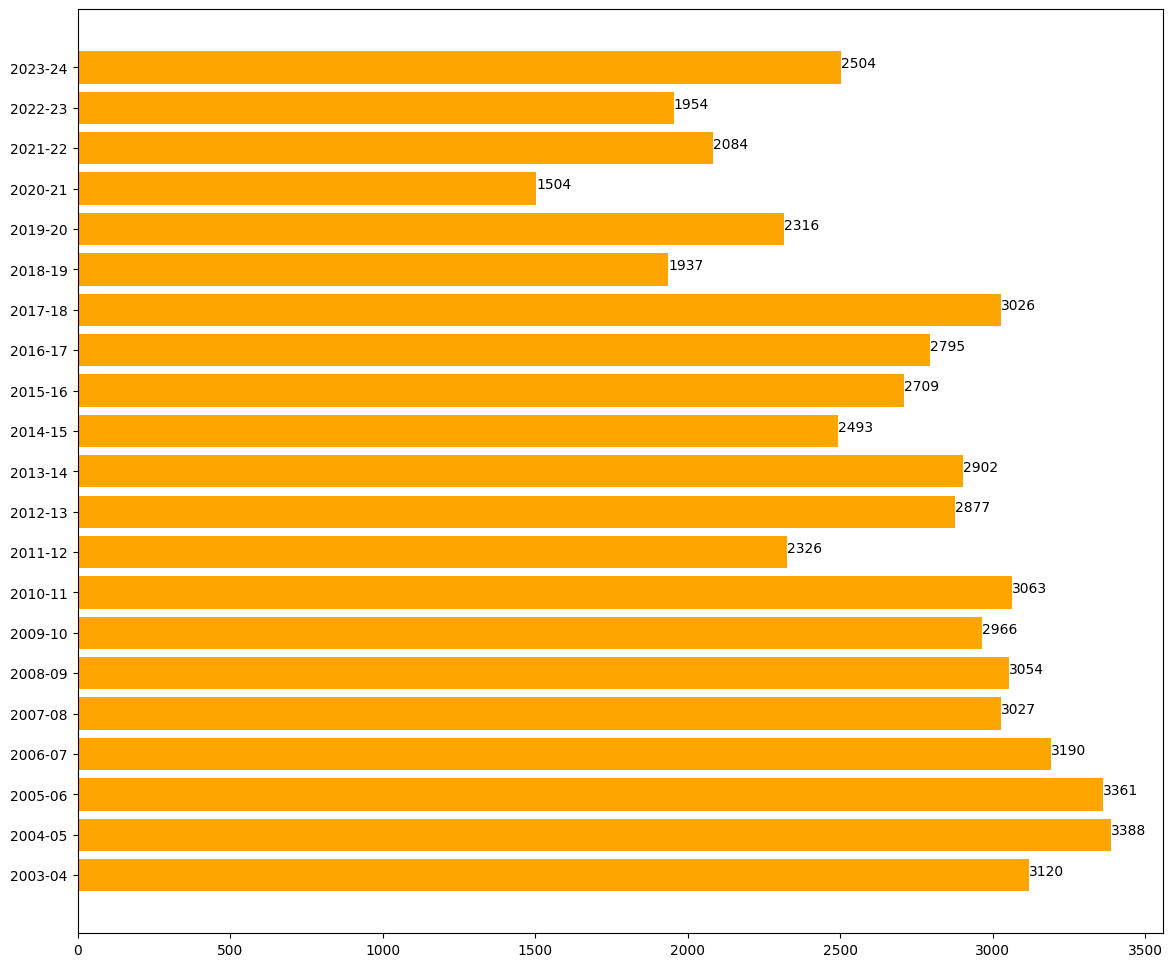

In [126]:
Y = min_array

plt.figure(figsize=(14,12))
minutes_plot = plt.barh(season_values,Y, color='Orange')

for index, value in enumerate(Y):
    plt.text(value, index, str(int(value)))


In [ ]:
# Com apenas 3 temporadas com menos de 2000 minutos jogados desde 2003, infere-se a partir do gráfico que Lebron mantém-se quantitativamente constante quando se
# trata de tempo em quadra. Um adendo para o seu menor tempo, 1504 minutos, que aconteceu na temporada de 2020 em que houveram sevéras paralisações em rezão da
# pandemia de COVID-19. Após 4 meses sem jogos, com o retorno da NBA em julho de 2020, Lebron parece estar tentando retomar sua "minutagem" mesmo com quase 40 anos
# e rumores de aposentadoria. Curiosamente, nas temporadas de [2003-2004), [2004,2005) Lebron, que pertencia ao Cleveland, não chegou a disputar playyoffs, ainda
# assim colecionou dois dos seus maiores tempos em jogo.

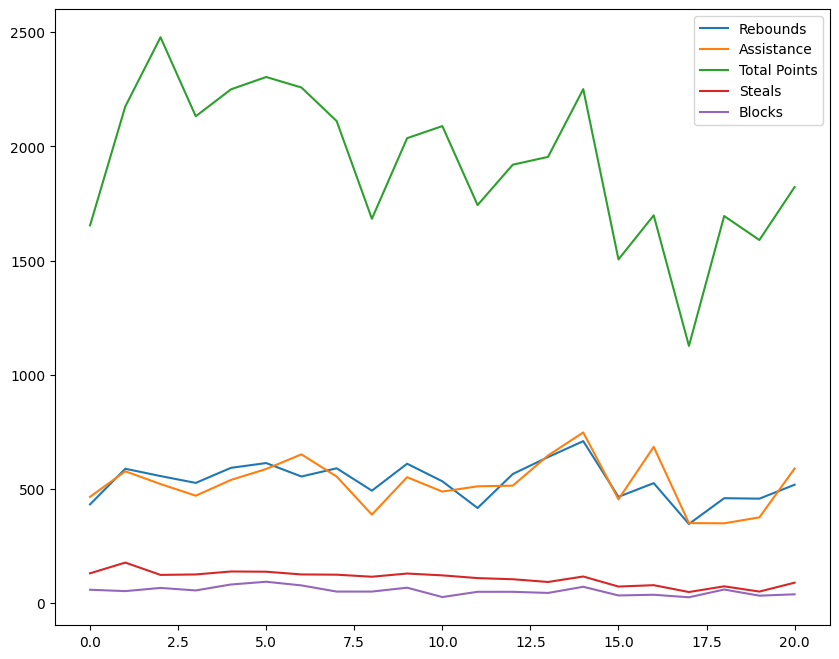

In [138]:
X = years_in_league_array

plt.figure(figsize=(10,8))
plt.plot(X, reb_array, label='Rebounds')
plt.plot(X, ast_array, label='Assistance')
plt.plot(X, pts_array, label='Total Points')
plt.plot(X, stl_array, label='Steals')
plt.plot(X, blk_array, label='Blocks')
plt.legend()

In [ ]:
'''
Lebron inegavelmente é um dos jogadores mais constantes em status. Com 39 anos o rosto dos Lakers tem, atualmente, média de 26 pontos por jogo e stats que nenhum
outro jogador dessa idade conseguiu manter. Ao longo de suas 21 temporadas, o quatro vezes mvp, anotou 51292 pontos. O maior pontuador da história da liga, dispõe
de seasons com quase 2500 pontos. Mesmo tendo realçado sua constância, Lebron obviamente teve uma queda de rendimento com a idade, sem perder sua imponência e
dominância em quadra, James se adapta como atleta, é perceptível pela atual crescente em assistências e rebotes totais que o jogador nas ultimas edições do
campeonato está mais adepto a jogar em função do time, dando margem para o crescimento ofensivo de outros jogadores em ascenção como Austin Reaves.
'''

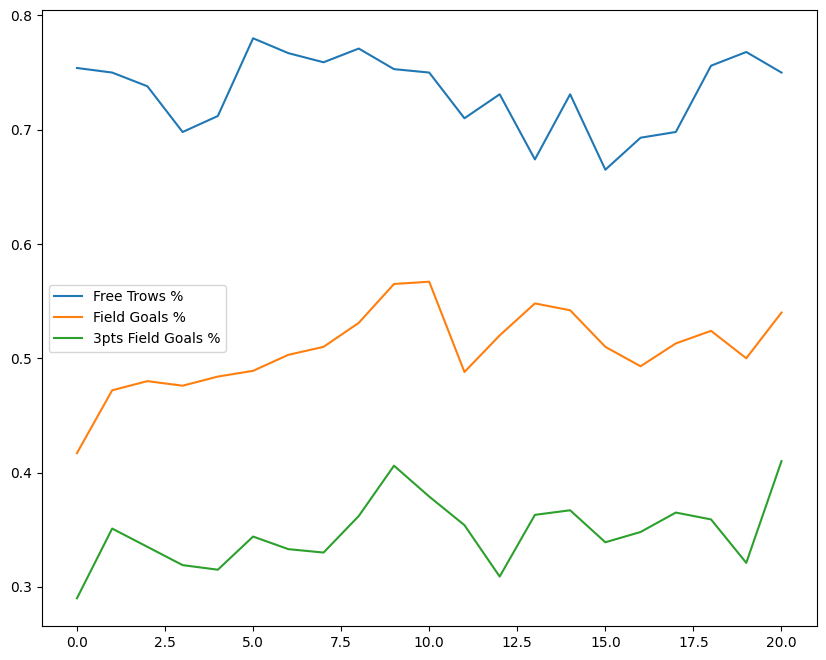

In [133]:
X = years_in_league_array

plt.figure(figsize=(10,8))
plt.plot(X, ft_pct_array, label='Free Trows %')
plt.plot(X, fg_pct_array, label='Field Goals %')
plt.plot(X, fg3_pct_array, label='3pts Field Goals %')
plt.legend()

In [ ]:
'''
Anotando mais de 70% de aproveitamento em lances livros em praticamente todas as temporadas desde 2003, Lebron vai na contra-mão do contexto atual da liga:
a resitência por optar arremessos de 3 reflete nas baixas stats em FG3 que normalmente são sempre menores do que 40%, por outro lado, sua agressividade e efetiva
infiltração construi um legado e histórico de FG % maior que 50%, que apesar de ser bom para um ala, falando do Lebron, é algo que se espera realmente não ser
a baixo disso, por isso as 3 quedas na porcentagem após 2013 alertam para problemas com o atleta.
'''

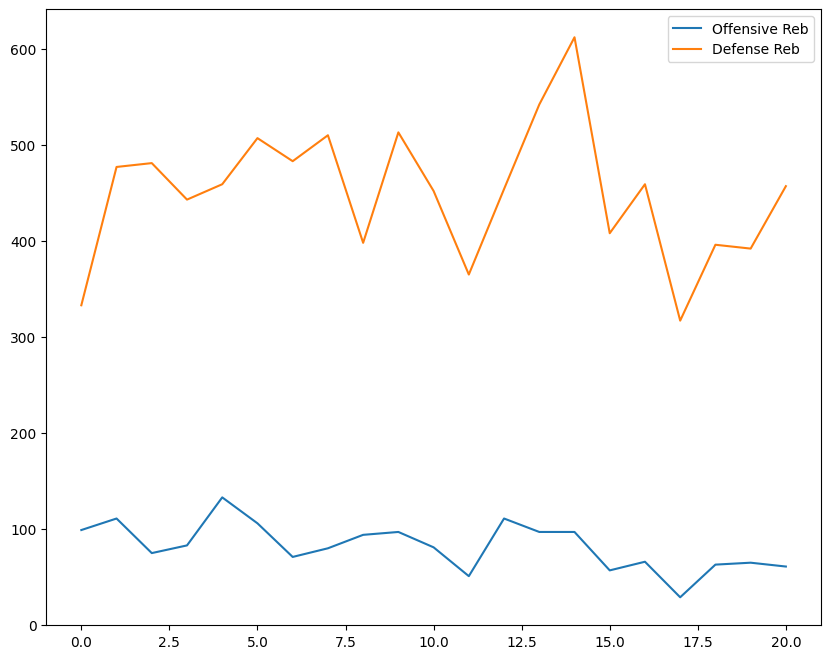

In [134]:
X = years_in_league_array

plt.figure(figsize=(10,8))
plt.plot(X, oreb_array, label='Offensive Reb')
plt.plot(X, dreb_array, label='Defense Reb')
plt.legend()

In [ ]:
"""
O estilo de jogo de Lebron, que é marcado pela agressividade nos contra ataques, infiltrações rápidas e eficazes faz com que o atleta não passe muito tempo armando
jogadas tão pouco jogando dentro do garrafão como um pivô. O Ala dos lakers ostenta rebotes defensivos, mas seu estilo de jogo no ataque limita seu numero de oreb.
"""

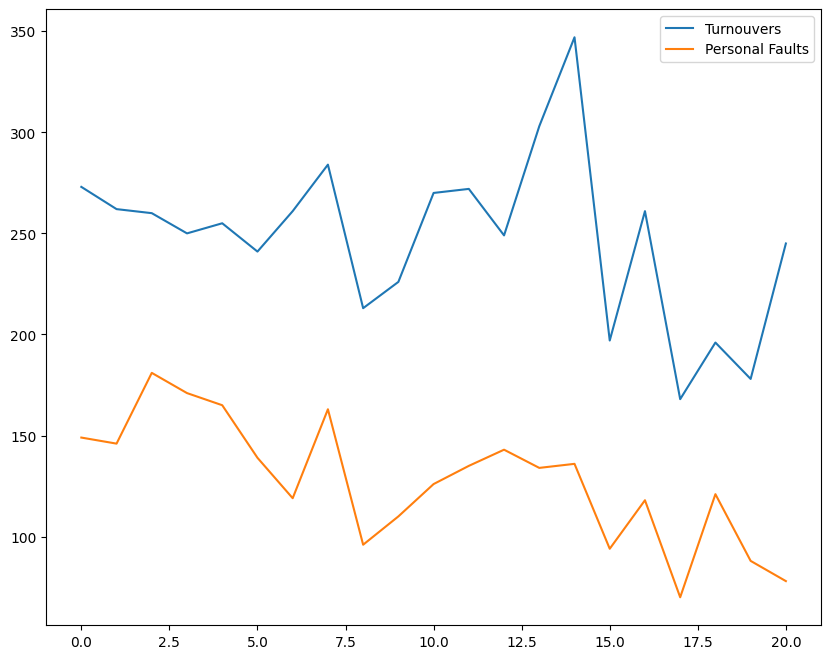

In [135]:
X = years_in_league_array

plt.figure(figsize=(10,8))
plt.plot(X, tov_array, label='Turnouvers')
plt.plot(X, pf_array, label='Personal Faults')
plt.legend()